In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Project: Predictive Mental Health Diagnostics in Chronic Disease Patients Using Multimodal Machine Learning

## Abstract
#### This project aims to predict mental health issues in chronic disease patients early, allowing healthcare providers to intervene sooner. By developing a machine learning model based on multiple data sources, we provide personalized, actionable insights for clinicians and patients.

## Objectives
* Develop a machine learning model to predict the likelihood of mental health issues in chronic disease patients.

* Provide personalized insights for clinicians and patients.

* Test the model’s effectiveness across different chronic diseases and demographics.

### 1. Data Collection and Preprocessing
* We Use Ai generated Data **'Because I Did Not Have A Domian Knowlege To Merge Different Type Of DataSet Together'**.
*  Our DataSet Features Behavioral and activity tracking,Psychological assessments,Electronic Health Records (EHR) (e.g., MIMIC-IV)

In [71]:
df = pd.read_csv("cleaned_depression_dataset.csv")

In [72]:
df

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Followup_PHQ9_Score,Symptoms,Demographic_Info
0,56,Arthritis,Mild,12.8,Poor,4.5,Low,Average,14.3,Moderate,severe depression,unemployed
1,48,Diabetes,Severe,8.4,Good,3.5,Medium,Average,16.7,Moderate,moderate anxiety,divorced
2,58,Heart Disease,Moderate,12.8,Average,3.7,Low,Poor,19.2,Moderately Severe,severe anxiety,single
3,68,Diabetes,Mild,14.9,Average,3.7,High,Average,13.5,Moderate,moderate depression,employed
4,47,Arthritis,Severe,5.6,Good,0.4,Medium,Good,12.9,Moderate,mild anxiety,unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,55,Heart Disease,Severe,6.0,Average,0.0,High,Good,16.9,Moderate,severe stress,unemployed
19996,67,Kidney Disease,Mild,14.7,Average,2.2,Low,Average,20.5,Moderately Severe,mild stress,divorced
19997,55,Arthritis,Mild,14.0,Poor,2.4,Low,Average,15.3,Moderately Severe,mild depression,employed
19998,71,Kidney Disease,Mild,9.5,Average,2.1,Medium,Average,20.3,Moderately Severe,moderate anxiety,employed


## The code below is basily showing the info of our data (ie, number of entries,datatype etc)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          20000 non-null  int64  
 1   Chronic_Disease_Type         20000 non-null  object 
 2   Disease_Severity             20000 non-null  object 
 3   Duration_of_Illness_Years    20000 non-null  float64
 4   Diet_Quality                 20000 non-null  object 
 5   Exercise_Frequency_Per_Week  20000 non-null  float64
 6   Social_Engagement            20000 non-null  object 
 7   Sleep_Quality                20000 non-null  object 
 8   Baseline_PHQ9_Score          20000 non-null  float64
 9   Followup_PHQ9_Score          20000 non-null  object 
 10  Symptoms                     20000 non-null  object 
 11  Demographic_Info             20000 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.8+ MB


## The code below is basily use to dectect our many missing value do we have in our data 

In [74]:
df.isnull().sum()

Age                            0
Chronic_Disease_Type           0
Disease_Severity               0
Duration_of_Illness_Years      0
Diet_Quality                   0
Exercise_Frequency_Per_Week    0
Social_Engagement              0
Sleep_Quality                  0
Baseline_PHQ9_Score            0
Followup_PHQ9_Score            0
Symptoms                       0
Demographic_Info               0
dtype: int64

### From line 6 to 12 we are check the total value present in each categorical column because we are going to convert each colomn using map method are we don't care abourt the order that we use for the convertion because we are using random forest algorim to train our nodel

In [75]:
df["Chronic_Disease_Type"].value_counts()

Chronic_Disease_Type
Heart Disease     5120
Arthritis         5027
Kidney Disease    4995
Diabetes          4858
Name: count, dtype: int64

In [76]:
df["Diet_Quality"].value_counts()

Diet_Quality
Average    9938
Good       5982
Poor       4080
Name: count, dtype: int64

In [77]:
df["Disease_Severity"].value_counts()

Disease_Severity
Mild        10027
Moderate     6947
Severe       3026
Name: count, dtype: int64

In [78]:
df["Social_Engagement"].value_counts()

Social_Engagement
Medium    9982
Low       5896
High      4122
Name: count, dtype: int64

In [79]:
df["Symptoms"].value_counts()

Symptoms
severe stress          2292
severe anxiety         2270
mild anxiety           2266
moderate anxiety       2248
mild depression        2227
mild stress            2198
severe depression      2196
moderate depression    2158
moderate stress        2145
Name: count, dtype: int64

In [80]:
df["Demographic_Info"].value_counts()

Demographic_Info
single        4072
employed      4010
unemployed    3994
married       3987
divorced      3937
Name: count, dtype: int64

In [81]:
df["Sleep_Quality"].value_counts()

Sleep_Quality
Average    9907
Good       6131
Poor       3962
Name: count, dtype: int64

### From line 13 to 19 we are converting the caetorical column in order for the data to work with our model and we are puting every convertion in order for convince 

In [82]:
df["Disease_Severity"] = df["Disease_Severity"].map({"Mild":0,"Moderate":1,"Severe":2})

In [83]:
df["Diet_Quality"] = df["Diet_Quality"].map({"Poor":0,"Average":1,"Good":2})

In [84]:
df["Demographic_Info"] = df["Demographic_Info"].map({"single":1,"married":2,"divorced":3,"unemployed":4,"employed":5})

In [85]:
df["Symptoms"] = df["Symptoms"].map({"mild stress":1,"mild anxiety":2,"mild depression":3,"moderate depression":13,"moderate anxiety":12,"moderate stress":11,
                                    "severe depression":23,"severe anxiety":22,"severe stress":21})

In [86]:
df["Sleep_Quality"] = df["Sleep_Quality"].map({"Poor":0,"Average":1,"Good":2})

In [87]:
df["Social_Engagement"] = df["Social_Engagement"].map({"Low":0,"Medium":1,"High":2})                                             

In [88]:
df["Chronic_Disease_Type"] = df["Chronic_Disease_Type"].map({"Heart Disease":1,"Arthritis":2,"Kidney Disease":3,"Diabetes":4})

### Cheching the statistical distrution of our dataset 

In [89]:
df.describe()

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Symptoms,Demographic_Info
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,50.073650,2.47955,0.649950,10.098250,1.095100,3.014365,0.91130,1.108450,15.245220,12.030800,2.994150
std,11.955094,1.11689,0.728108,4.853229,0.702909,1.465210,0.70218,0.702078,3.313478,8.233058,1.419689
min,18.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000
25%,42.000000,1.00000,0.000000,6.700000,1.000000,2.000000,0.00000,1.000000,12.900000,3.000000,2.000000
50%,50.000000,2.00000,0.000000,10.000000,1.000000,3.000000,1.00000,1.000000,15.300000,12.000000,3.000000
75%,58.000000,3.00000,1.000000,13.400000,2.000000,4.000000,1.00000,2.000000,17.500000,21.000000,4.000000
max,85.000000,4.00000,2.000000,28.700000,2.000000,7.000000,2.00000,2.000000,26.200000,23.000000,5.000000


### This our model afyter converting it's categorical columns

In [90]:
df

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Followup_PHQ9_Score,Symptoms,Demographic_Info
0,56,2,0,12.8,0,4.5,0,1,14.3,Moderate,23,4
1,48,4,2,8.4,2,3.5,1,1,16.7,Moderate,12,3
2,58,1,1,12.8,1,3.7,0,0,19.2,Moderately Severe,22,1
3,68,4,0,14.9,1,3.7,2,1,13.5,Moderate,13,5
4,47,2,2,5.6,2,0.4,1,2,12.9,Moderate,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,55,1,2,6.0,1,0.0,2,2,16.9,Moderate,21,4
19996,67,3,0,14.7,1,2.2,0,1,20.5,Moderately Severe,1,3
19997,55,2,0,14.0,0,2.4,0,1,15.3,Moderately Severe,3,5
19998,71,3,0,9.5,1,2.1,1,1,20.3,Moderately Severe,12,5


### Converting the target conlumn

In [91]:
df["target_Followup_PHQ9_Score"] = df["Followup_PHQ9_Score"].map({"Mild":1,"Moderate":2,"Severe":4,"Moderately Severe":3,"Minimal":0})

## Cheching the correlation of our dataset

<Axes: >

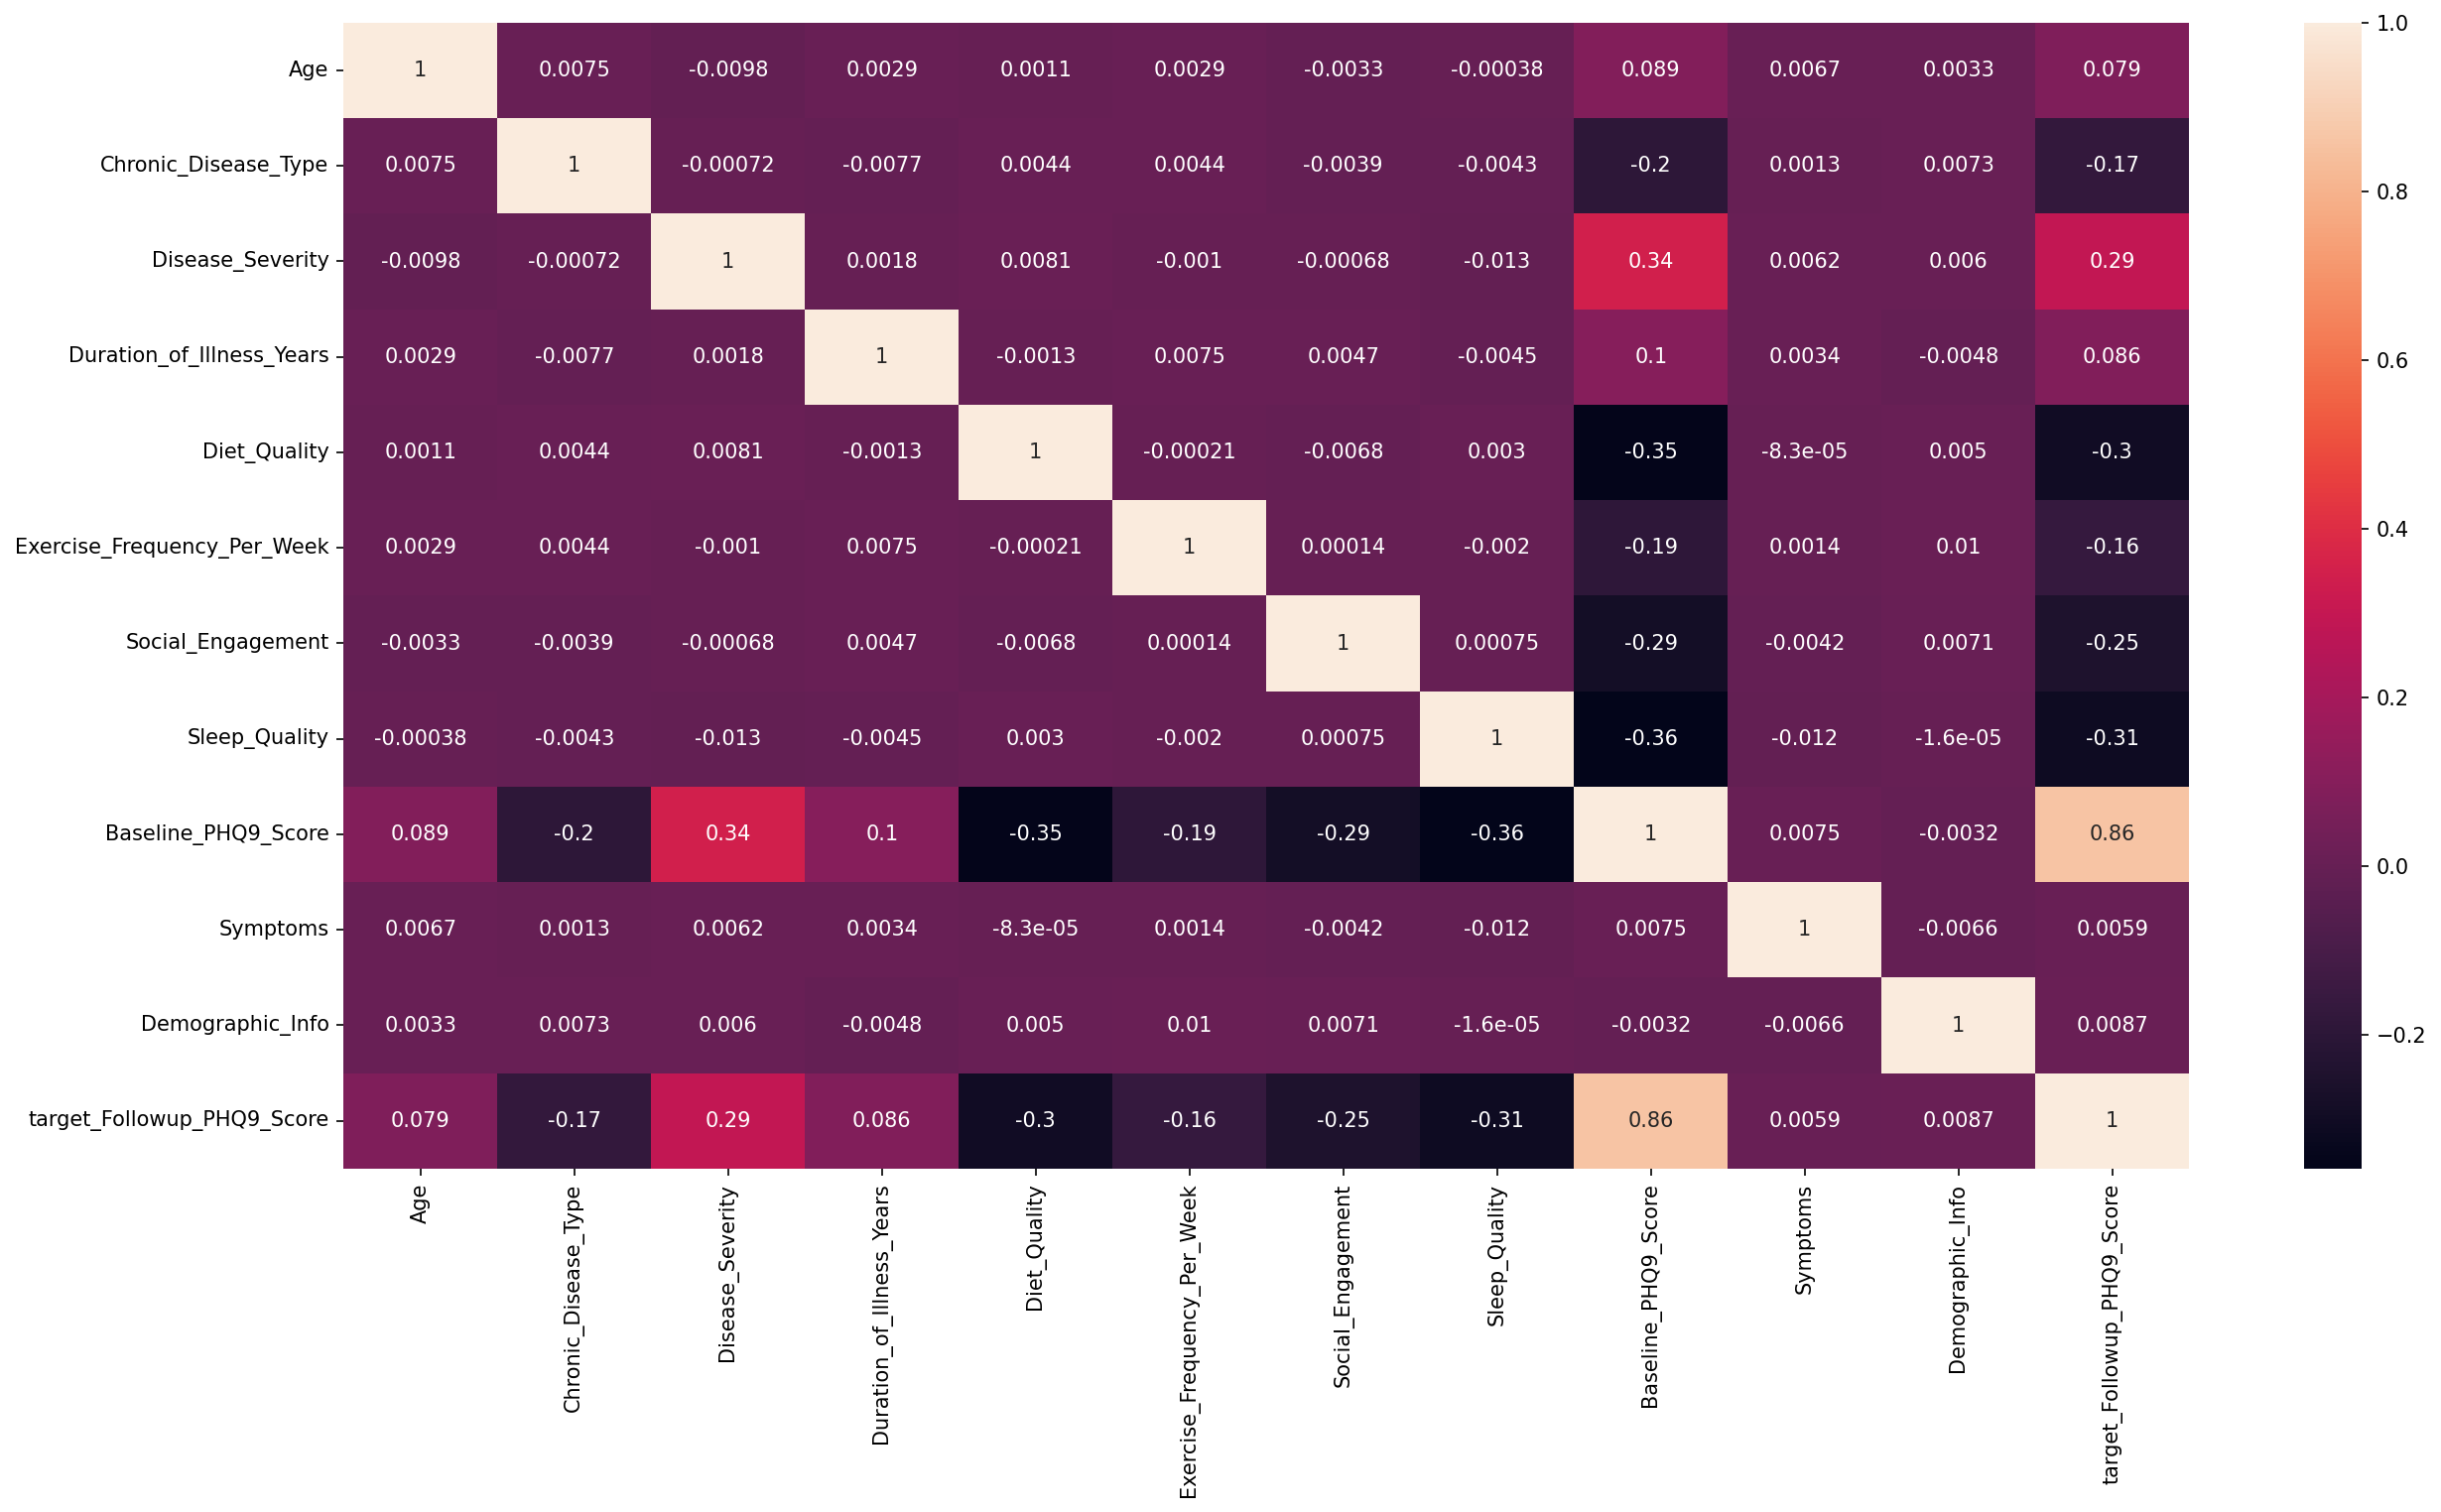

In [92]:
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Check if there is an outliers in our dataset 

<Axes: ylabel='target_Followup_PHQ9_Score'>

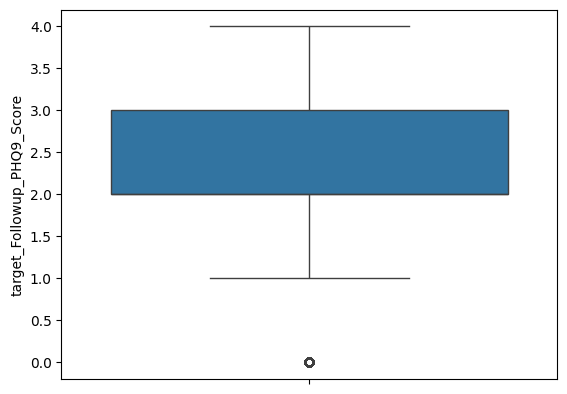

In [93]:
sns.boxplot(df["target_Followup_PHQ9_Score"])

## Checking for outliers so i can remove it from our model for better prediction

In [95]:
# Calculate Q1, Q3, and IQR
Q1 = df['target_Followup_PHQ9_Score'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['target_Followup_PHQ9_Score'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['target_Followup_PHQ9_Score'] < lower_bound) | (df['target_Followup_PHQ9_Score'] > upper_bound)]


## After checking for outliers we dectect like 212 rows of outliers

In [97]:
outliers

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Followup_PHQ9_Score,Symptoms,Demographic_Info,target_Followup_PHQ9_Score
47,63,4,1,7.0,2,3.1,2,2,8.4,Minimal,23,5,0
102,46,2,0,18.3,2,4.3,1,2,8.8,Minimal,22,3,0
130,31,4,0,11.1,2,4.3,2,2,4.9,Minimal,23,2,0
176,50,2,0,8.2,2,4.2,2,1,7.9,Minimal,1,2,0
178,47,2,1,12.1,2,5.3,1,2,7.6,Minimal,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,57,2,1,2.5,2,3.9,2,0,8.0,Minimal,12,1,0
19477,45,1,0,7.0,2,5.4,2,2,6.5,Minimal,13,1,0
19483,43,4,0,4.3,2,2.9,2,2,4.8,Minimal,2,2,0
19842,61,2,0,6.8,2,3.5,2,2,6.6,Minimal,23,3,0


## We use the code below to remove outliers from our data set

In [98]:
cleaned_df = df[(df["target_Followup_PHQ9_Score"] >= lower_bound) & (df["target_Followup_PHQ9_Score"] <= upper_bound)]

In [99]:
cleaned_df = cleaned_df.drop("Followup_PHQ9_Score",axis=1)


## This is our new cleaned data and no outliers compare to the initial box plot

<Axes: ylabel='target_Followup_PHQ9_Score'>

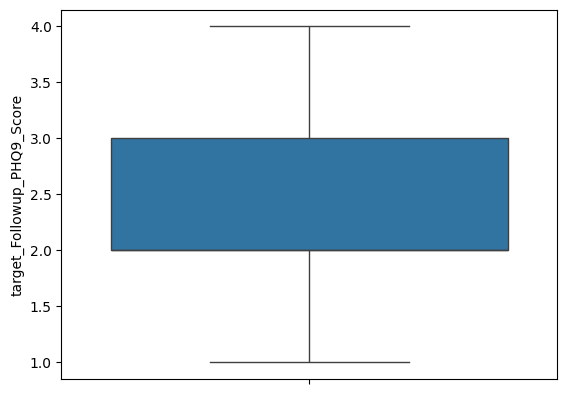

In [101]:
sns.boxplot(cleaned_df["target_Followup_PHQ9_Score"])

In [102]:
cleaned_df

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Symptoms,Demographic_Info,target_Followup_PHQ9_Score
0,56,2,0,12.8,0,4.5,0,1,14.3,23,4,2
1,48,4,2,8.4,2,3.5,1,1,16.7,12,3,2
2,58,1,1,12.8,1,3.7,0,0,19.2,22,1,3
3,68,4,0,14.9,1,3.7,2,1,13.5,13,5,2
4,47,2,2,5.6,2,0.4,1,2,12.9,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,55,1,2,6.0,1,0.0,2,2,16.9,21,4,2
19996,67,3,0,14.7,1,2.2,0,1,20.5,1,3,3
19997,55,2,0,14.0,0,2.4,0,1,15.3,3,5,3
19998,71,3,0,9.5,1,2.1,1,1,20.3,12,5,3


## Creating our X feature and y label or target

In [103]:
X = cleaned_df.drop("target_Followup_PHQ9_Score",axis=1)
y = cleaned_df["target_Followup_PHQ9_Score"]

## Using train_test_split to split and surfie our dataso we will be able to split it to train and test features

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()

## Training our model to see if it will bring out nice performance 

In [108]:
model.fit(X_train,y_train)

RandomForestClassifier()

## Prediction of our model

In [109]:
y_predict = model.predict(X_test)

In [110]:
y_predict

array([2, 1, 2, ..., 2, 2, 1])

In [111]:
from sklearn.metrics import classification_report,accuracy_score,RocCurveDisplay,ConfusionMatrixDisplay,confusion_matrix

## Checking for our model error (ie evaluating our model performance)

In [112]:
model_accuracy = accuracy_score(y_test,y_predict)
model_error = classification_report(y_test,y_predict)

## As we can see our model error is not too good or too bad 

In [114]:
print("accuracy: ",model_accuracy)
print(model_error)

accuracy:  0.7773286171467071
              precision    recall  f1-score   support

           1       0.76      0.74      0.75      1034
           2       0.79      0.83      0.81      3029
           3       0.78      0.73      0.76      1711
           4       0.67      0.55      0.60       163

    accuracy                           0.78      5937
   macro avg       0.75      0.71      0.73      5937
weighted avg       0.78      0.78      0.78      5937



##  Checking the confusion matrix of our model (still the same with error evaluation) 

In [115]:
cm = confusion_matrix(y_test,y_predict)

In [116]:
cm

array([[ 763,  271,    0,    0],
       [ 246, 2512,  271,    0],
       [   0,  416, 1251,   44],
       [   0,    0,   74,   89]])

<Figure size 1600x1000 with 0 Axes>

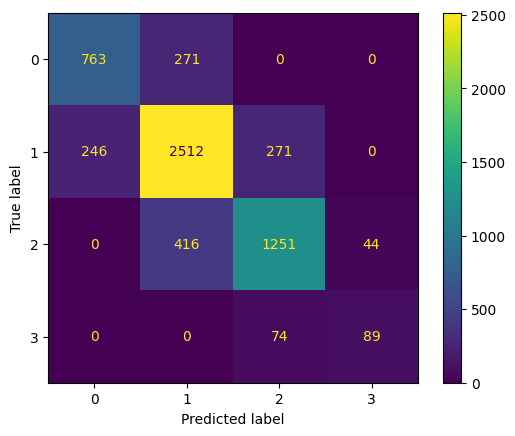

In [117]:
plt.figure(figsize=(16,10))
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Now we want to fine tune  our model for better and more accurate performance using Grind Search cv(cross validation) 

In [118]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [119]:
# Initialize the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42,class_weight="balanced")

# Fit the model to the training data
best_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

## Fine turning the model didnt really change anything 

In [121]:
# Make predictions
y_predict = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.91      0.75      1034
           2       0.84      0.69      0.76      3029
           3       0.74      0.77      0.75      1711
           4       0.53      0.69      0.60       163

    accuracy                           0.75      5937
   macro avg       0.69      0.77      0.72      5937
weighted avg       0.77      0.75      0.75      5937

Confusion Matrix:
 [[ 936   98    0    0]
 [ 521 2094  414    0]
 [   0  294 1318   99]
 [   0    0   50  113]]


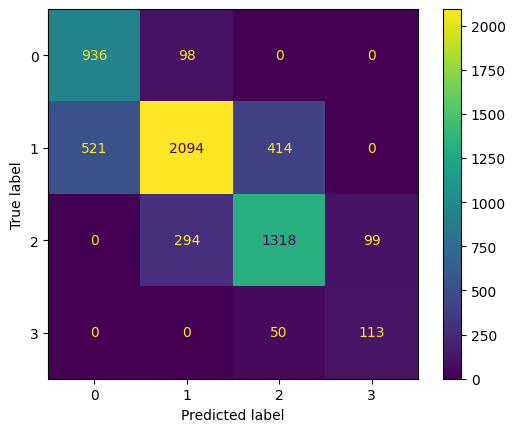

In [122]:
ConfusionMatrixDisplay(cm).plot()

## Now we want to bring out best future in our model that is good for predicting if someone is likely to be depressed

<Axes: >

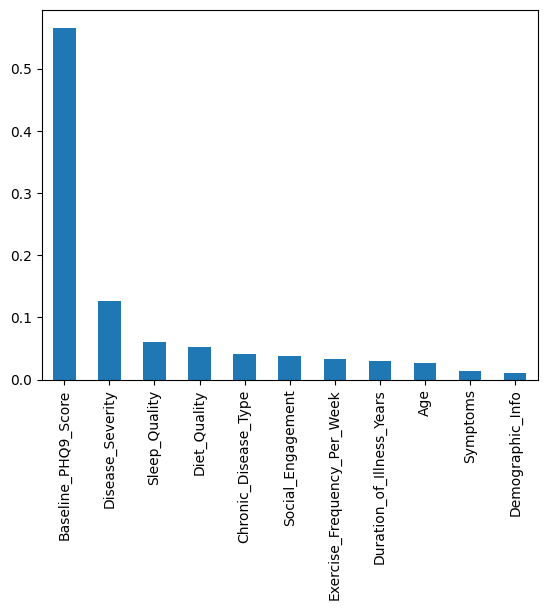

In [141]:
# Get feature importances
importances = best_rf.feature_importances_
features_name = best_rf.feature_names_in_

(pd.Series(importances,index=features_name).sort_values(ascending=False).plot(kind="bar"))

In [143]:
import shap

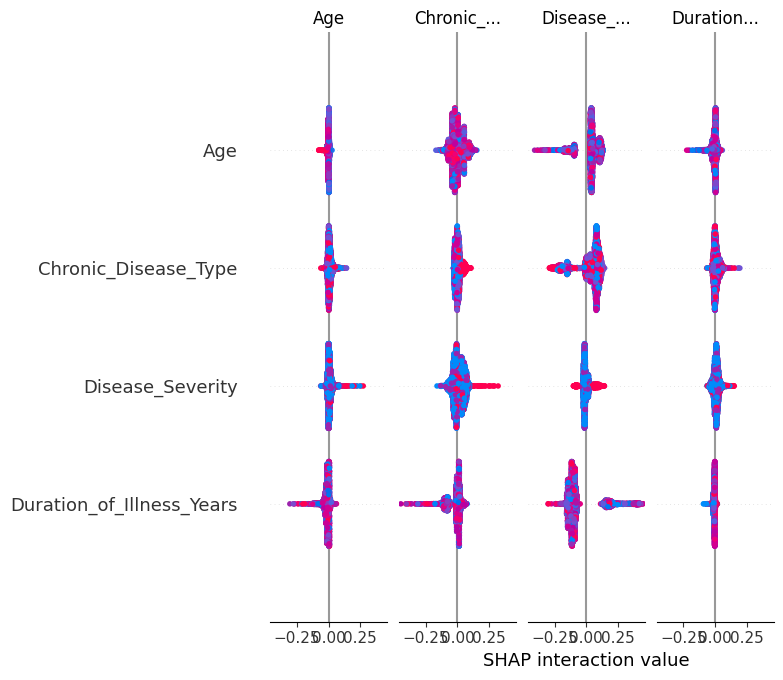

In [146]:
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=best_rf.feature_names_in_)


# Domain-Specific Mapping for Categorical Columns
**Chronic Disease Type::** Heart Disease: 1, Arthritis: 2, Kidney Disease: 3, Diabetes: 4

**Disease Severity::** Mild: 0, Moderate: 1, Severe: 2

**Diet Quality::** Poor: 0, Average: 1, Good: 2

**Exercise Frequency Per Week::** Numerical values representing the frequency (e.g., 0, 1, 2, ... 7)

**Social Engagement::** Low: 0, Medium: 1, High: 2

**Sleep Quality::** Poor: 0, Average: 1, Good: 2

**Symptoms::** Mild Stress: 1, Mild Anxiety: 2, Mild Depression: 3, Moderate Stress: 11, Moderate Anxiety: 12, Moderate Depression: 13, Severe Stress: 21, Severe Anxiety: 22, Severe Depression: 23

**Demographic Info::** Single: 1, Married: 2, Divorced: 3, Unemployed: 4, Employed: 5

**Follow-up PHQ-9 Score (Target Variable)::** Minimal: 0, Mild: 1, Moderate: 2, Moderately Severe: 3, Severe: 4


In [149]:
final_model = RandomForestClassifier(**best_params, random_sc tate=42,class_weight="balanced")

In [150]:
final_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

In [160]:
new_patient_data = {
    'Age': 55,
    'Chronic_Disease_Type': 3,
    'Disease_Severity': 2,
    'Duration_of_Illness_Years': 10,
    'Diet_Quality': 2,
    'Exercise_Frequency_Per_Week': 3,
    'Social_Engagement': 1,
    'Sleep_Quality': 1,
    'Symptoms': 13,
    'Demographic_Info': 5,
    'Baseline_PHQ9_Score': 10  # Example value for Baseline_PHQ9_Score
}

# Convert to DataFrame
input_df = pd.DataFrame([new_patient_data],columns=X.columns)

In [161]:
input_df

,Age,Chronic_Disease_Type,Disease_Severity,Duration_of_Illness_Years,Diet_Quality,Exercise_Frequency_Per_Week,Social_Engagement,Sleep_Quality,Baseline_PHQ9_Score,Symptoms,Demographic_Info
0,55,3,2,10,2,3,1,1,10,13,5


In [162]:
Real_world_prediction = final_model.predict(input_df)

In [163]:
Real_world_prediction

array([1])

The prediction above is great because! It means our model predicted a **"Mild" follow-up PHQ-9 score**(ie, numeric value: 1) for the new patient data. This suggests that, based on the provided input data, the patient's depression severity is expected to be mild at the follow-up. yummy

### Our model is Ready for deploy